# Overlapping-generations model

In previous lectures, we studied a simple two-period consumption-savings problem
in *partial equilibrium*. This can be taken to a general-equilibrium setting 
if we assume that at each point in time there are two generations alive,
one young and one old.

Additionally, we extend the model with the same production sector that we introduced 
in the previous lecture, i.e., perfectly competitive firms 
with Cobb-Douglas technology which use capital $K$ and labor $L$.
Unlike in the previous lecture, we now study a setting with
*endogenous* capital which arises from the households' savings decision,
but we fix labor supply to be exogenous.

*Additional material*

- [The Overlapping Generations Model](https://intro.quantecon.org/olg.html)
  on QuantEcon provides an alternative exposition of this topic.

## Steady-state equilibrium

We first study the steady-state equilibrium, i.e., an equilibrium where all quantities and prices are constant over time. If the economy starts in steady state, it will remain there as long as the parameters don't change. In the last section, we extend this analysis and study transition dynamics when the economy experiences an unanticipated shock to TFP which takes it away from steady state.

### Household problem

At each point in time, the economy is populated by $N$ identical young and 
$N$ identical old household. Without loss of generality, we set $N=1$.
Each cohort solves a two-period consumption-savings problem which
we encountered earlier,
$$
\begin{aligned}
\max_{c_y,~c_o,~a} \enskip & \Bigl\{ u(c_y) + \beta u(c_o) \Bigr\} \\
\text{s.t.} \quad c_y + a &= w \\
                  c_o &= (1+r)a \\
    c_y &\geq 0, ~ c_o \geq 0,~ a \geq 0
\end{aligned}
$$
where $\beta$ is the discount factor,
$r$ is the interest rate, $w$ is the wage income received when young, $a$ are savings by the young, 
and $(c_y,c_o)$ is the optimal consumption allocation
when young and old, respectively. 
Per-period utility $u(c)$ is the CRRA utility function given by
$$
u(c) = \begin{cases}
    \frac{c^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
    \log(c) & \text{if } \gamma = 1
    \end{cases}
$$
where $\gamma$ is the RRA coefficient and $\log(\bullet)$ denotes
the natural logarithm.

We assume that the household inelastically supplies one unit of labor when 
young, therefore $w$ is both the wage rate and their labor income.
We impose that the household does not work when old, and it therefore
needs to rely on its savings to finance consumption.

### Firm problem


The firm problem is almost the same we studied in the previous lecture:
Firms combine capital $K$ and labor $L$ in a 
[Cobb-Douglas production function](https://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function)
to produce output $Y$,
$$
Y = z K^{\alpha} L^{1-\alpha}
$$
and maximize profits $\Pi$ according to
$$
\max_{K,~L} \enskip \Pi = z K^{\alpha} L^{1-\alpha} - (r + \delta) K - w L
$$
where $(r + \delta) K$ is the cost of capital and $wL$ is the cost of labor.
We assume that capital depreciates by a fraction $\delta$ each period
so that $r$ is the net return on capital after depreciation.

The solution is characterized by the firm's first-order conditions
<a id='olg-firm-prices'></a>
$$
\tag{1}
\begin{aligned}
r + \delta &= \alpha z \left(\frac{K}{L}\right)^{\alpha-1} = \alpha z k^{\alpha-1} \\
w &= (1-\alpha) z\left(\frac{K}{L}\right)^{\alpha} = (1-\alpha) z k^{\alpha}
\end{aligned}
$$
where we define the capital-labor ratio as $k \equiv \frac{K}{L}$.
We'll use these conditions in the numerical solution below.


### Equilibrium

The general equilibrium in this economy is a set of quantities $(K,L,Y,c_o,c_y,a)$ and prices $(r,w)$ 
which solve the household's and firm's problem
such that the following market clearing conditions are satisfied:

- Asset market: $K = N a$ (capital $K$ demanded by firms equals aggregate savings $N a$ supplied by households).
- Labor market: $L = N$ (labor $L$ demanded by firms equals exogenously supplied labor by households).
- Goods market: $Y + (1-\delta)K = N(c_y + c_o + a)$ (aggregate output
 & undepreciated capital equal the amount of goods consumed by young and old each period and investment by the young).

Due to Walras' Law, we only have to make sure that two of these markets clear as this implies market clearing in the residual market. 

*Note:* The goods market clearing condition might differ from the one you are used to, $Y_t = C_t + I_t$, where aggregate output is equal to aggregate consumption $C_t$ and investment $I_t$.
However, these two conditions are equivalent since aggregate consumption is $C = N(c_y + c_y)$, and the next-period capital stock is $K_{t+1} = N a$. Plugging these expressions into the goods market clearing condition from above, we have
$$
Y_t + (1-\delta)K_t = C_t + K_{t+1} \quad \Longrightarrow \quad Y_t = C_t + 
    \underbrace{K_{t+1} - (1-\delta)K_t}_{I_t}
$$

### Some useful analytical results

To solve the problem numerically, we explore an alternative to what we did in the previous lectures where we ran a minimizer to solve the household problem. Instead, we use the household's 
first-order conditions to find an analytical expression for the savings rate $s$ so we don't have to
run a minimizer.

Let the *savings rate* $s$ be the fraction of resources saved when young, i.e., 
$$
\begin{aligned}
    a &= s w \\
    c_y &= (1-s) w \\
    c_o &= (1+r) s w
\end{aligned}
$$
We can then rewrite the maximization problem in terms of the single variable $s$,
$$
\max_{s \in [0, 1]} \enskip
 u\Bigl( \underbrace{(1-s)w}_{c_y} \Bigr) 
 + \beta u\Bigl(\underbrace{(1+r)sw}_{c_o} \Bigr)
$$
We can ignore the constraints $s \geq 0$ and $s \leq 1$ since we know that
consuming zero either when young or old will result in $-\infty$ utility,
so these constraints won't be binding. The Lagrangian for this 
problem is therefore just the lifetime utility,
$$
\mathcal{L} = u\Bigl((1-s)w \Bigr) + \beta u\Bigl((1+r)sw \Bigr)
$$
Taking the derivate with respect to $s$, we see that
$$
\frac{\partial \mathcal{L}}{\partial s}
 = - u'\Bigl((1-s)w \Bigr)w + \beta u'\Bigl((1+r)sw \Bigr)(1+r)w = 0
$$
This is the usual *Euler equation* that we would expect to find for this
type of problem, but expressed in terms of the savings rate $s$:
$$
 u'\Bigl( \underbrace{(1-s)w}_{c_y} \Bigr) 
 = \beta (1+r) u'\Bigl(\underbrace{(1+r)sw}_{c_o} \Bigr)
$$
Using the functional form for the utility function, the Euler equation becomes
$$
\Bigl((1-s)w\Bigr)^{-\gamma}
 = \beta (1+r) \Bigl((1+r)sw \Bigr)^{-\gamma}
$$
After some manupulations, this can be solved for optimal $s$:
<a id='olg-hh-srate'></a>
$$
\tag{2}
s = \frac{1}{1 + \beta^{-\frac{1}{\gamma}} (1+r)^{1-\frac{1}{\gamma}}}
$$
We'll use this expression to compute capital supply by households 
for a given interest rate.

### Numerical solution

#### Solution algorithm

The structure of the solution algorithm is similar to the previous lecture. This time, we opt to find the equilibrium capital-labor ratio $k = \frac{K}{L}$, but we could have just as well opted to iterate over one of the equilibrium prices $r$ or $w$.

The implementation to find the general equilibrium proceeds as follows:

1. Define the problem's parameters.

2. Write a function which computes prices $(r,w)$ for a given $k$ 
    (use the firm's first-order conditions from [(1)](#olg-firm-prices)).

3.  Write a function which solves the household problem for given $r$ and returns
    the optimal savings rate (use the analytical solution [(2)](#olg-hh-srate)).

4.  Write a function $f(k)$ which returns the excess demand for capital $K - Na$
    for a given capital-labor ratio is $k$.

    Use the functions defined in steps (2) and (3) for this purpose.

5.  Call a root-finder to locate the root of $f$ where $f(k^*) = 0$.
    The root-finder will repeatedly call $f$ to locate the equilibrium $k^*$.

6.  Once the root-finder terminates and returns the equilibrium $k^*$,
    compute and store all other equilibrium quantities and prices.

#### Implementation

In [1]:
# Enable automatic reloading of external modules
%load_ext autoreload
%autoreload 2

##### Step 1: Problem parameters

The full implementation is provided in the file [`lecture07_olg.py`](lecture07_olg.py).
For expositional convenience, the following code segments replicate selected code blocks from that file.

We define a 
[`data class`](https://docs.python.org/3/library/dataclasses.html)
called `Parameters` to store the problem parameters:

In [2]:
from dataclasses import dataclass

@dataclass
class Parameters:
    """
    Parameters for the overlapping generations model.
    """
    alpha: float = 0.36     # Capital share in production function
    delta: float = 1.0      # Depreciation rate (full depreciation)
    z: float = 1.0          # TFP 
    beta: float = 0.96**30  # Discount factor
    gamma: float = 2.0      # RRA in utility
    N: int = 1              # Number of households per cohort  


Since there are only two adult generations alive at any point in time, it seems reasonable to assume that one period corresponds to roughly 30 years. This is reflected in the choice of parameters: 

-   If we apply the standard discount factor at *annual* frequency of 0.96 over 30 years, the resulting discount factor for this calibration should be $\beta = 0.96^{30}$, i.e., the annual discount factor taken to the power of 30.
-   Similarly, if capital depreciates by a few percent a year, over 30 years the capital stock will have almost fully depreciated, so for simplicity we set $\delta = 1$ to reflect that (you can verify that an annual depreciation of 6% results 
in a depreciation of $1 - (1 - 0.06)^{30} \approx 0.84$ over 30 years).

We can now define an instance of Parameters to be used below.

In [3]:
# Create parameter instance
par = Parameters()

##### Step 2: Compute equilibrium prices from $k$

The root-finder will ask us to evaluate excess capital demand for each conjectured $k$. First, we implement the following function to map $k$ to factor prices $r$ and $w$ using the firm's first-order conditions.

In [4]:
def compute_prices(k, par: Parameters):
    """
    Return factor prices for a given capital-labor ratio and parameters.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    r : float
        Return on capital after depreciation (interest rate)
    w : float
        Wage rate

    """

    # Return on capital after depreciation (interest rate)
    r = par.alpha * par.z * k**(par.alpha - 1) - par.delta

    # Wage rate
    w = (1-par.alpha) * par.z * k**par.alpha
    
    return r, w

##### Step 3: Solve the household problem

The second building block required for the root-finder is the solution to the household problem.
We define the following function which returns the household's optimal savings rate
given $r$:

In [5]:
def compute_savings_rate(r, par: Parameters):
    """
    Compute the savings rate using the analytical solution
    to the household problem.

    Parameters
    ----------
    r : float
        Return on capital after depreciation (interest rate)
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    s : float
        Savings rate
    """

    s = 1/(1 + par.beta**(-1/par.gamma) * (1+r)**(1-1/par.gamma))

    return s

<div class="alert alert-info">
<h3> Your turn</h3>

Plot the households's optimal savings rate <i>s</i> returned by <tt>compute_savings_rate()</tt> 
for <tt>r</tt> on the interval [0.01, 0.2]. Does the shape intuitively make sense (given the parameter for the risk aversion γ)?
</div>

##### Step 4: Compute excess capital demand

We can now combine the return values from these functions to compute excess demand for capital, implemented in the function below. This function will be called by the root-finder to find the equilibrium $k^*$.

In [6]:
def compute_capital_ex_demand(k, par: Parameters):
    """
    Compute the excess demand for capital.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    ex_demand : float
        Excess demand for capital
    """
    
    # Compute prices from firm's FOCs
    r, w = compute_prices(k, par)

    # Compute savings rate
    srate = compute_savings_rate(r, par)

    # Aggregate supply of capital by households (savings)
    A = srate * w * par.N

    # Aggregate labor supply
    L = par.N

    # Aggregate capital demand
    K = k * L

    # Excess demand for capital
    ex_demand = K  - A

    return ex_demand

<div class="alert alert-info">
<h3> Your turn</h3>

Plot the function <tt>compute_capital_ex_demand()</tt> for <tt>k</tt> on the interval [0.01, 0.3] to verify that the function indeed has a root.

</div>

##### Step 5: Call the root-finder

We can now test the code by calling the root-finder. We use the default `'brentq'` method but could just as well have opted for a Newton-based algorithm.

In [7]:
from scipy.optimize import root_scalar

# Initial bracket for k used by root-finder
bracket = (1.0e-3, 1)

# Call root-finder. Pass Parameters using args argument.
res = root_scalar(
    compute_capital_ex_demand, bracket=bracket, args=(par, )
)


Inspecting the result returned by the root-finder shows that the algorithm terminated successfully:

In [8]:
res

      converged: True
           flag: converged
 function_calls: 14
     iterations: 13
           root: 0.06615197337785264
         method: brentq

##### Step 6: Compute remaining equilibrium quantities

It is convenient to wrap the root-finder into an additional function which also computes and returns the remaining equilibrium quantities and prices. These are stored in the dedicated data class `SteadyState`, defined below:

In [9]:
@dataclass
class SteadyState:
    """
    Steady-state equilibrium of the OLG model.
    """
    par: Parameters = None      # Parameters used to compute equilibrium
    c_y: float = None           # Consumption when young
    c_o: float = None           # Consumption when old 
    a: float = None             # Savings when young
    s: float = None             # Savings rate when young    
    r: float = None             # Interest rate (return on capital)
    w: float = None             # Wage rate
    K: float = None             # Aggregate capital stock
    L: float = None             # Aggregate labor demand
    I: float = None             # Aggregate investment
    Y: float = None             # Aggregate output

The following function calls the root-finder, computes the equilibrium values and returns these as an instance of `SteadyState`: 

In [10]:
def compute_steady_state(par: Parameters):
    """
    Compute the steady-state equilibrium for the OLG model.

    Parameters
    ----------
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    eq : SteadyState
        Steady state equilibrium of the OLG model
    """

    # Find the equilibrium k=K/L with a root-finder. Excess demand for capital
    # has to be zero in equilibrium.
    res = root_scalar(
        compute_capital_ex_demand, bracket=(1.0e-3, 1), args=(par, )
    )

    if not res.converged:
        print('Equilibrium root-finder did not terminate successfully')

    # Equilibrium K
    K = res.root * par.N

    # Create instance of equilibrium class
    eq = SteadyState(par=par, K=K, L=par.N)

    # Equilibrium prices
    eq.r, eq.w = compute_prices(eq.K / eq.L, par)

    # Investment in steady state
    eq.I = eq.K * par.delta
    
    # Equilibrium household choices
    eq.s = compute_savings_rate(eq.r, par)
    eq.a = eq.s * eq.w
    eq.c_y = eq.w - eq.a
    eq.c_o = (1 + eq.r) * eq.a

    # Equilibrium output
    eq.Y = par.z * eq.K**par.alpha * eq.L**(1-par.alpha)

    # Aggregate consumption
    C = par.N * (eq.c_y + eq.c_o)
    # Check that goods market clearing holds using Y = C + I
    assert abs(eq.Y - C - eq.I) < 1.0e-8

    return eq

In [11]:
# Compute equilibrium, store as equilibrium instance 
eq = compute_steady_state(par)

The module [`lecture07_olg.py`](lecture07_olg.py) implements a helper function `print_steady_state()` which can be used to report the equilibrium quantities in a nicely formatted fashion: 

In [12]:
from lecture07_olg import print_steady_state

# Print equilibrium allocation & prices
print_steady_state(eq)

Steady-state equilibrium:
  Households:
    c_y = 0.17460
    c_o = 0.13542
    a = 0.06615
  Firms:
    K = 0.06615
    L = 1.00000
    Y = 0.37618
  Prices:
    r = 1.04718
    w = 0.24076
  Market clearing:
    Capital market: -6.93889e-17
    Goods market: 1.66533e-16


<div class="alert alert-info">
<h3> Your turn</h3>

You are interested in how the equilibrium prices depend on the cohort size <i>N</i>. Plot the equilibrium prices <i>r</i> and <i>w</i> when varying <i>N</i> over the range of integers from 1 to 10.

</div>

***
## Transition dynamics

In the previous section we solved for the steady state, where the economy would remain absent any exogenous changes. We now investigate what happens when the economy is hit by unanticipated shocks (so-called "MIT shocks"). Because these shocks are unanticipated, households don't form expectations over them, and once a shock is realized, households have perfect foresight of the dynamic path the economy takes towards a new steady state
(full information rational expectations, a common assumption in macroeconomics).


### Household problem

The household problem is unchanged from before, but now all quantities have additional time indices $t$ as prices and optimal choices are allowed to change along the transition path:
$$
\begin{aligned}
\max_{c_{y,t},~c_{o,t+1},~a_t} \enskip & \Bigl\{ u(c_{y,t}) + \beta u(c_{o,t+1}) \Bigr\} \\
\text{s.t.} \quad c_{y,t} + a_t &= w_t \\
                  c_{o,t+1} &= (1+r_{t+1})a_t \\
    c_{y,t} &\geq 0, ~ c_{o,t+1} \geq 0,~ a_t \geq 0 \enskip \text{for all } t
\end{aligned}
$$
Note that the consumption when old now explicitly depends on the interest rate *next period*, $r_{t+1}$, which can be different from the interest rate in $t$.


### Firm problem

As firms solve a purely static problem, it remains unchanged from earlier.

### Equilibrium

The equilibrium definition is also unchanged from before, but we explicitly add time indices $t$.
The general equilibrium in this economy is a set of quantities $(K_t,L_t,Y_t,c_{o,t},c_{y,t},a_t)$ and prices $(r_t,w_t)$ 
which solve the household's and firm's problem
such that the following market clearing conditions are satisfied:

- Asset market: $K_t = N a_{t-1}$ (capital $K_t$ demanded by firms equals aggregate savings $N a_{t-1}$ supplied by households).
- Labor market: $L_t = N$ (labor $L_t$ demanded by firms equals exogenously supplied labor by households).
- Goods market: $Y_t + (1-\delta)K_t = N(c_{y,t} + c_{o,t} + a_t)$ (aggregate output
 & undepreciated capital equal the amount of goods consumed by young and old each period and investment by the young).

### Analytical results

The household's first-order conditions are unchanged from earlier, but we have to be more careful with the timing. The optimal savings rate in $t$ is now given by
<a id='olg-trans-srate'></a>
$$
\tag{3}
s_t = \left[ 1 + \beta^{-\frac{1}{\gamma}} (1+r_{t+1})^{1-\frac{1}{\gamma}}\right]^{-1}
$$
It is important to note that the savings rate $s_t$ in period $t$ depends on the return on savings $r_{t+1}$ realized in $t+1$, which in turn depends on $s_t$. Because of the perfect foresight assumption, rational households know the future path of interest rates after a shock hits the economy.

As you can guess from [(3)](#olg-trans-srate), the expression for the savings rate does not have a analytical solution in general. 
We instead solve for the transition dynamics using the simplifying assumption of log preferences with $\gamma = 1$, as then the
savings rate becomes
$$
s_t = \frac{\beta}{1+\beta}
$$
In this case, the savings rate is constant across time and only depends on parameters. We therefore don't need to know $r_{t+1}$ to know how much young households want to save. This is of course the consequence of log preferences where income and substitution effects cancel out, and the household's optimal savings choice does not depend on $r$.

We relax the assumption of log preferences in the optional exercises at the end of this lecture. This requires an additional root-finding step in each simulation period.

### Transition dynamics

Consider the following sequence of events:

1.  The economy is in the steady state implied by the original parameters.
2.  The economy is hit by an unexpected *permanent* drop in TFP $z$ of 10%.
    All households understand that $z$ is going to remain at this lower level forever and 
    adjust their choices accordingly.

#### Transition path

We can compute household choices and aggregates along the transition path towards the new steady state implied by 
the permanently lower TFP level using the following algorithm.
We maintain the assumption of log preferences, so that the savings rate $s$ is constant along the transition path.

- Period $t=0$: The economy is in the steady state with $K_0 = K^*$, $w_0 = w^*$, $a_0 = a^*$ etc.
- Period $t \geq 1$:
    -   The capital stock is pre-determined from the previous period, $K_t = N a_{t-1}$
    -   Production takes place:
        -   Young households earn $w_t = (1-\alpha) z_t (K_t / L)^{\alpha}$
        -   Old households earn gross asset returns $(1+r_t)a_{t-1}$ with $r_t = \alpha z_t (K_t / L)^{\alpha -1} - \delta$
    -   Consumption and savings:
        - Young households save $a_t = s w_t$ and consume $c_{y,t} = (1-s) w_t$
        - Old households consume $c_{o,t} = (1+r_t) a_{t-1}$


### Numerical implementation

We first define a data class called `Simulation` which stores the time series for each simulated variable in the economy. Note that now the data type is declared to be `np.ndarray` since these attributes are going to be arrays.

In [13]:
import numpy as np

@dataclass
class Simulation:
    c_y: np.ndarray = None      # Time series for consumption when young
    c_o: np.ndarray = None      # Time series for consumption when old 
    a: np.ndarray = None        # Time series for savings when young
    s: np.ndarray = None        # Time series for savings rate when young
    r: np.ndarray = None        # Time series for interest rate (return on capital)
    w: np.ndarray = None        # Time series for wages
    K: np.ndarray = None        # Time series for aggregate capital stock
    Y: np.ndarray = None        # Time series for aggregate output
    z: np.ndarray = None        # Time series for TFP
    

Next, we compute the initial steady-state equilibrium which is the starting point of the simulation:

In [14]:
# Parameter instance with risk aversion gamma=1
par = Parameters(gamma=1)

# Compute equilibrium at original TFP level
eq_init = compute_steady_state(par)

# Print initial equilibrium
print_steady_state(eq_init)  

Steady-state equilibrium:
  Households:
    c_y = 0.16717
    c_o = 0.12167
    a = 0.04912
  Firms:
    K = 0.04912
    L = 1.00000
    Y = 0.33796
  Prices:
    r = 1.47669
    w = 0.21630
  Market clearing:
    Capital market: -1.98591e-14
    Goods market: 4.92384e-14


We now implement the function `simulate_olg()` which takes the initial equilibrium as a starting point, assumes that TFP $z$ permanently drops to the new value `z_new`, and simulates the transition dynamics for $T$ periods.

We use the helper function `initialize_sim()` from the module 
[`lecture07_olg`](lecture07_olg.py)
which initializes the simulated time series to the required array sizes and sets the first element of each series to the corresponding initial equilibrium value.

In [15]:
import copy
from lecture07_olg import initialize_sim

def simulate_olg(z_new, eq: SteadyState, T = 10):
    """
    Simulate the transition dynamics of the overlapping generations model.

    Parameters
    ----------
    z_new : float
        New level of TFP after the shock.
    eq : SteadyState
        Initial steady-state equilibrium before the shock.
    T : int
        Number of periods to simulate.

    Returns
    -------
    sim : Simulation
        Simulation object containing the time series for each variable.
    """

    # Retrieve parameter object attached to steady-state equilibrium
    par = eq.par

    # The following code only works for log utility
    if par.gamma != 1:
        raise ValueError('Simulation only implemented for log utility')
    
    # Initialize simulation instance and allocate arrays
    sim = initialize_sim(T, eq)

    # TFP is assumed to be at new level for all remaining periods
    sim.z[1:] = z_new

    # Copy parameters to avoid changing the original instance
    par_ = copy.copy(par)

    # Savings rate is independent of r for gamma = 1 and constant over time
    s = par.beta / (1 + par.beta)
    sim.s[:] = s

    for t in range(1, T+1):
        # Update TFP with current value
        par_.z = sim.z[t]

        # Capital stock is predetermined by savings of old in previous period
        sim.K[t] = sim.a[t-1] * par.N

        # Prices given predetermined capital stock and current z
        sim.r[t], sim.w[t] = compute_prices(sim.K[t] / par.N, par_)

        # Savings by the young
        sim.a[t] = s * sim.w[t]
        # Consumption by the young
        sim.c_y[t] = (1-s) * sim.w[t]
        # Consumption by the old
        sim.c_o[t] = (1 + sim.r[t]) * sim.a[t-1]
        # Aggregate output
        sim.Y[t] = sim.z[t] * sim.K[t]**par.alpha * par.N**(1-par.alpha)

        # Verify that goods market clearing holds
        demand = par.N * (sim.c_y[t] + sim.c_o[t] + sim.a[t])
        supply = sim.Y[t] + (1 - par.delta) * sim.K[t]
        assert abs(demand - supply) < 1.0e-8

    return sim

Using `simulate_olg()`, we simulate $T=10$ periods (in addition to the initial period $t=0$):

In [16]:
# Number of periods to simulate
T = 20

# New TFP level (10% drop from steady state)
z_new = 0.9 * par.z

# Perform simulation
sim = simulate_olg(z_new, eq_init, T=T)

As we'll see shortly, the economy converges very quickly to the new steady state implied by $z = 0.9$, which we can compute explicitly:

In [17]:
# Compute new steady state using new TFP level
eq_new = compute_steady_state(par=Parameters(gamma=par.gamma, z=z_new))

# Print new steady state (transition end point)
print_steady_state(eq_new)

Steady-state equilibrium:
  Households:
    c_y = 0.14180
    c_o = 0.10320
    a = 0.04167
  Firms:
    K = 0.04167
    L = 1.00000
    Y = 0.28666
  Prices:
    r = 1.47669
    w = 0.18346
  Market clearing:
    Capital market: -1.22541e-14
    Goods market: 3.04201e-14


As you can see, the new steady state is characterized by a lower capital stock $K$, lower output $Y$, and lower wages $w$. However, the interest rate is identical in both states. The reason is that the steady-state interest rate in this model only depends on the parameters $\beta$, $\gamma$ and $\alpha$, but not on $z$ (this is not overly surprising since $z$ changes the scale of the economy, but this should not effect relative quantities such as the interest rate).

Lastly, we use the function `plot_simulation()` implemented in the [`lecture07_olg`](lecture07_olg.py) module to plot selected impulse response functions (IRFs) along the transition path. We do this in terms of relative deviations from the initial steady state (a standard way to display IRFs in macroeconomics), except for the interest rate which is plotted in absolute deviations from the initial steady state.

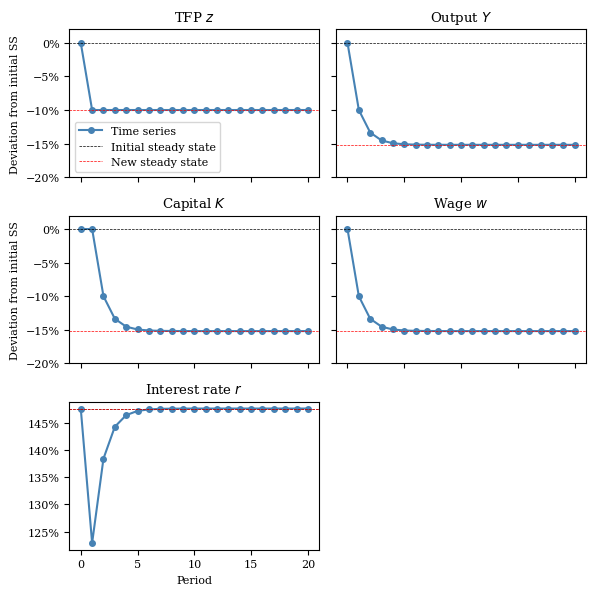

In [18]:
from lecture07_olg import plot_simulation

# Plot impulse responses for selected variables
plot_simulation(eq_init, sim, eq_new)

As the figure shows, the economy very quickly converges to the new steady state within a few periods.

<div class="alert alert-info">
<h3> Your turn</h3>

As a robustness check, verify that the simulated trajectories are <i>constant</i> if the new TFP level is unchanged from the initial TFP level.

</div>

***
## Optional exercises

### Exercise 1: Transitory vs persistent TFP changes

In the lecture, we studied the transition dynamics of a *permanent* change to TFP where the economy transitioned to a new steady state. In this exercise, you are asked to examine two alternative scenarios in which the economy eventually returns to the original steady state:

1.  A *transitory* one-time drop in TFP in period $t=1$ by 10%. For periods $t \geq 2$, the TFP level is back to its steady-state level $z=1$.
2.  A *persistent* drop in TFP: in period $t=1$, TFP drops by 10%. Thereafter, the gap between the current TFP level and the original
    steady-state level $z=1$ shrinks geometrically so that
    $$
    z_{t+1} = (1-\kappa) z_t + \kappa z
    $$
    which means that TFP will eventually return to its steady-state level. For this exercise, assume that $\kappa = 0.1$, i.e., in each period
    the gap to the steady-state value shrinks by 10%.

Assume log preferences ($\gamma = 1$) and modify the `simulate_olg()` function from the lecture so that it accepts a whole time series of TFP values and performs
the simulation for this given TFP sequence.

Create two time series for TFP for the scenarios (1) and (2) described above with $T=50$ periods (both starting from the steady state), and plot the resulting impulse response functions
using the `plot_simulation()` function from the module [`lecture07_olg`](lecture07_olg.py).


***
### Exercise 2: Transition dynamics for general CRRA preferences

So far, we have imposed log preferences as this simplifies simulating the economy. In this exercise, we relax this assumption and implement simulation code for the general CRRA case.

#### Optimal savings rate

Recall that the optimal savings rate in $t$ is given by
<a id='olg-trans-srate'></a>
$$
\tag{3}
s_t = \left[ 1 + \beta^{-\frac{1}{\gamma}} (1+r_{t+1})^{1-\frac{1}{\gamma}}\right]^{-1}
$$
It is important to note that the savings rate $s_t$ in period $t$ depends on the return on savings $r_{t+1}$ realized in $t+1$. Because of the perfect foresight assumptions, rational households know the future path of interest rates after a shock hits the economy (full information rational expectations, a common assumption in macroeconomics).

As you can guess from [(3)](#olg-trans-srate), the expression for the savings rate does not have a analytical solution in general: Recall from the firm's
first-order conditions [(1)](#olg-firm-prices) that the interest rate *next period* is given by
$$
r_{t+1} = \alpha z_{t+1} \left(\frac{K_{t+1}}{N}\right)^{\alpha-1}  - \delta
$$
where $L = N$ follows from labor market clearing.
Moreover, from the asset market clearing condition we have that
$$
K_{t+1} = N a_t = N s_t w_t
$$
so ultimately $r_{t+1}$ itself depends on $s_t$:
$$
r_{t+1} = \alpha z_{t+1} \left( s_t  w_t \right)^{\alpha-1} - \delta
$$
It is therefore not possible to find a closed-form solution for $s_t$ with $\gamma \neq 1$, thus
we need to resort to root-finding when simulating each period. The remainder of this exercise guides you through the process of implementing this simulation.


#### Euler equation errors

In previous lectures we applied root-finding to first-order conditions,
and we are going to repeat this approach here. 
Recall from the main text that the Euler equation for this problem is
given by
$$
\Bigl((1-s_t)w_t\Bigr)^{-\gamma}
 = \beta (1+r_{t+1}) \Bigl((1+r_{t+1})s_t w_t \Bigr)^{-\gamma}
$$
We can rewrite this as a function $f(s)$ defined as
$$
f(s) = \Bigl((1-s_t)w_t\Bigr)^{-\gamma} - \beta (1+r_{t+1}) \Bigl((1+r_{t+1})s_t w_t \Bigr)^{-\gamma}
$$
Clearly, in each period we need to find the optimal savings rate such that $f(s^*) = 0$.

For a given guess of $s$, we can evaluate both sides of the Euler equation as follows:

1.  Using the pre-determined $K_t = N a_{t-1}$ and the current $z_t$, 
    we compute $w_t$ from the firm's first-order conditions [(1)](#olg-firm-prices).
2.  Using the guess for $s$, we compute next period's capital stock
    $K_{t+1} = Nsw_t$.
3.  With $K_{t+1}$ and $z_{t+1}$ in hand, we compute $r_{t+1}$ from the 
    firm's first-order conditions (note that households know $z_{t+1}$
    with certainty due to the perfect foresight assumption).
4.  We now have all terms on the left- and right-hand-side of the Euler equation
    and can therefore compute the Euler equation error $f(s)$ for the current guess $s$.

#### Implementation

You are now asked to adapt the `simulate_olg()` function written earlier and incorporate the above root-finding step in order to determine the optimal $s_t$ in each period on the transition path.

1.  You can reuse the classes and functions `SteadyState`, `Parameters`, `Simulation`, `compute_steady_state()`, and `initialize_sim()`
    from the module [`lecture07_olg`](lecture07_olg.py).
2.  Write a function `euler_err()` which implements the algorithm outlined above. The function should have the following signature:

    ```python
    def euler_err(s, w, z_next, par: Parameters):
        """
        Compute the euler equation error for a given savings rate.

        Parameters
        ----------
        s : float
            Savings rate
        w : float
            Wage rate today
        z_next : float
            TFP tomorrow
        par : Parameters
            Parameters for the given problem

        Returns
        -------
        ex_demand : float
            Excess demand for capital
        """
    ```

    The additional parameters `w` and `z_next` are required since the current wage rate $w_t$ 
    and next-period's TFP $z_{t+1}$ are needed to evaluate both sides of the Euler equation.

3.  Augment the function `simulate_olg()` so that it calls a root-finder in each 
    period to determine the optimal savings rate.

4.  Use the default paremeter values from `Parameters` (including $\gamma = 2$)
    and run the simulation for the geometrically decaying TFP shock
    from Exercise 1 for $T=50$ periods.

5.  Use the `plot_simulation()` function from [`lecture07_olg`](lecture07_olg.py)
    to plot the impulse response functions.

***
## Solutions for optional exercises

### Solution for exercise 1

Since this exercise requires only slight modifications of the code from the main text, we reuse most of the classes and functions defined in 
[`lecture07_olg`](lecture07_olg.py):

In [19]:
from lecture07_olg import (
    SteadyState,
    Parameters,
    compute_steady_state,
    compute_prices,
    initialize_sim,
    plot_simulation
)

The `simulate_olg()` function needs to be modified to accept a time series of $z_t$ instead of a single value `z_new`. The rest of the implementation remains unchanged:

In [20]:
import numpy as np
import copy

def simulate_olg(z_series, eq: SteadyState):
    """
    Simulate the transition dynamics of the overlapping generations model
    using a given time series for TFP.

    Parameters
    ----------
    z_series : np.array
        Time series of TFP levels to be used for simulation.
    eq : SteadyState
        Initial steady-state equilibrium before the shock.
    T : int
        Number of periods to simulate.

    Returns
    -------
    sim : Simulation
        Simulation object containing the time series for each variable.
    """

    # Retrieve parameter object attached to steady-state equilibrium
    par = eq.par

    # The following code only works for log utility
    if par.gamma != 1:
        raise ValueError('Simulation only implemented for log utility')
    
    # Number of periods to simulate (excluding initial period)
    T = len(z_series) - 1
    
    # Initialize simulation instance and allocate arrays
    sim = initialize_sim(T, eq)

    # Set TFP series
    sim.z[:] = z_series

    # Copy parameters to avoid changing the original instance
    par_ = copy.copy(par)

    # Savings rate is independent of r for gamma = 1 and constant over time
    s = par.beta / (1 + par.beta)
    sim.s[:] = s

    for t in range(1, T+1):
        # Update TFP with current value
        par_.z = sim.z[t]

        # Capital stock is predetermined by savings of old in previous period
        sim.K[t] = sim.a[t-1] * par.N

        # Prices given previous-period capital stock
        sim.r[t], sim.w[t] = compute_prices(sim.K[t] / par.N, par_)

        # Savings by the young
        sim.a[t] = s * sim.w[t]
        # Consumption by the young
        sim.c_y[t] = (1-s) * sim.w[t]
        # Consumption by the old
        sim.c_o[t] = (1 + sim.r[t]) * sim.a[t-1]
        # Aggregate output
        sim.Y[t] = sim.z[t] * sim.K[t]**par.alpha * par.N**(1-par.alpha)

        # Verify that goods market clearing holds
        demand = par.N * (sim.c_y[t] + sim.c_o[t] + sim.a[t])
        supply = sim.Y[t] + (1 - par.delta) * sim.K[t]
        assert abs(demand - supply) < 1.0e-8

    return sim

#### Scenario (1): Transitory TFP shock

For this scenario, we create a TFP array of 51 elements and set these all to the steady-state TFP level $z=1$, except for the value in period $t=2$, which is set 10% lower.

In [21]:
# Parameter instance with risk aversion gamma=1
par = Parameters(gamma=1)

# Number of periods to simulate
T = 50

# TFP series with a one-time drop in TFP
z_series = np.full(T+1, fill_value=par.z)
z_series[1] = 0.9 * par.z

# Steady state equilibrium (initial and terminal)
eq = compute_steady_state(par)

# Perform simulation
sim = simulate_olg(z_series, eq)

We plot the impulse response functions using the same `plot_simulation()` function we used earlier.

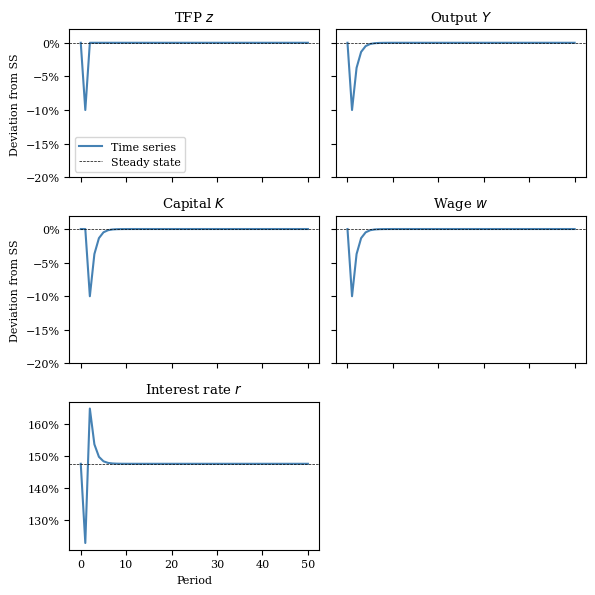

In [22]:
plot_simulation(eq, sim)

As you can see, the economy takes a few periods to return to its old steady state even though the TFP shock itself lasted for only one period.

#### Scenario (2): Geometrically decaying TFP shock

For this scenario, we apply the law-of-motion for $z_t$ given above to get a TFP shock which decays geometrically and eventually reverts to its steady-state level.

In [23]:
# Decay parameter
kappa = 0.1

# Create TFP series with exponential decay
z_series = np.empty(T+1)
z_series[0] = par.z
z_series[1] = 0.9 * par.z
for t in range(2, T+1):
    z_series[t] = (1 - kappa) * z_series[t-1] + kappa * par.z

# Steady state equilibrium (initial and terminal)
eq = compute_steady_state(par)

# Perform simulation
sim = simulate_olg(z_series, eq)

We again plot the impulse response functions. As you see, these are now much more persistent than in the first scenario since TFP itself takes much longer to return to its steady state level.

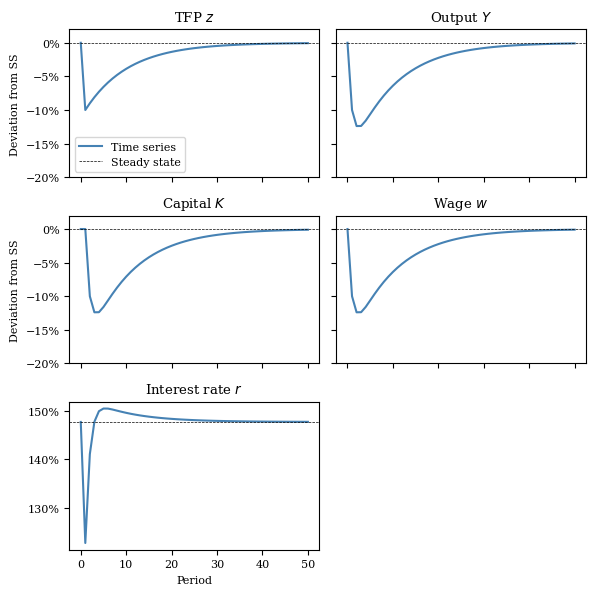

In [24]:
plot_simulation(eq, sim)

***
### Solution for exercise 2

#### Part (1)

For this exercise, we reuse some of the code from the lecture:

In [25]:
from lecture07_olg import (
    SteadyState,
    Parameters,
    compute_steady_state,
    initialize_sim,
    plot_simulation
)

#### Part (2)

We first reimplement the `compute_prices()` function because we now need to evaluate factor prices for $z_t$ other than the value stored in `Parameters`. We therefore add `z` as an explicit argument:

In [26]:
def compute_prices(k, z, par: Parameters):
    """
    Return factor prices for a given capital-labor ratio, TFP, and parameters.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    z : float
        TFP
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    r : float
        Return on capital after depreciation (interest rate)
    w : float
        Wage rate

    """

    # Return on capital after depreciation (interest rate)
    r = par.alpha * z * k**(par.alpha - 1) - par.delta

    # Wage rate
    w = (1-par.alpha) * z * k**par.alpha
    
    return r, w

Next, we implement the `euler_err()` which computes the Euler equation errors for a given savings rate $s$. Note that we additionally need to know the current wage rate $w_t$ and next-period's TFP $z_{t+1}$ in order to evaluate both sides of the Euler equation.

In [27]:
def euler_err(s, w, z_next, par: Parameters):
    """
    Compute the euler equation error for a given savings rate.

    Parameters
    ----------
    s : float
        Savings rate
    w : float
        Wage rate today
    z_next : float
        TFP tomorrow
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    err : float
        Euler equation error for given s
    """

    # Savings by the young TODAY (= capital of the old TOMORROW)
    a = s * w

    # Capital-labor ratio TOMORROW
    k_next = a
    
    # Compute TOMORROW's prices from firm's FOCs
    r_next, _ = compute_prices(k_next, z_next, par)

    # Consumption by the young
    c_y = (1 - s) * w
    # Consumption by the old
    c_o = (1 + r_next) * a

    # Left-hand side of Euler equation
    lhs = c_y**(-par.gamma)
    # Right-hand side of Euler equation
    rhs = par.beta * (1 + r_next) * c_o**(-par.gamma)
    
    # Euler equation error
    err = lhs - rhs

    return err

#### Part (3)

We now embed the call to the root-finder in each simulation period which calls `euler_err()` to locate the optimal savings rate $s_t$.
Most parts of the simulation code remain unchanged from the `simulate_olg()` function defined in the lecture. 

In [28]:
import numpy as np
from scipy.optimize import root_scalar


def simulate_olg_crra(z_series, eq: SteadyState):
    """
    Simulate the transition dynamics of the OLG model
    using a given time series for TFP for arbitrary RRA parameters.

    Parameters
    ----------
    z_series : np.array
        Time series of TFP levels to be used for simulation.
    eq : SteadyState
        Initial steady-state equilibrium before the shock.
    T : int
        Number of periods to simulate.

    Returns
    -------
    sim : Simulation
        Simulation object containing the time series for each variable.
    """

    # Retrieve parameter object attached to steady-state equilibrium
    par = eq.par

    # Number of periods to simulate (excluding initial period and terminal period)
    T = len(z_series) - 2

    # Initialize simulation instance and allocate arrays
    sim = initialize_sim(T, eq)

    # Set TFP series
    sim.z = z_series

    for t in range(1, T + 1):
        # Capital stock is predetermined by savings of old in previous period
        sim.K[t] = sim.a[t-1] * par.N

        # Prices given current capital stock and current TFP
        sim.r[t], sim.w[t] = compute_prices(sim.K[t] / par.N, sim.z[t], par)

        # Additional arguments for euler_err()
        args = (sim.w[t], sim.z[t+1], par)

        # Find savings rate that satisfies the Euler equation
        res = root_scalar(euler_err, bracket=(0.001, 0.999), args=args)

        if not res.converged:
            print(f"Root-finder did not converge at t={t}")

        # Savings rate
        sim.s[t] = res.root
        # Savings by the young
        sim.a[t] = sim.s[t] * sim.w[t]
        # Consumption by the young
        sim.c_y[t] = (1 - sim.s[t]) * sim.w[t]
        # Consumption by the old
        sim.c_o[t] = (1 + sim.r[t]) * sim.a[t-1]
        # Aggregate output
        sim.Y[t] = sim.z[t] * sim.K[t] ** par.alpha * par.N ** (1 - par.alpha)

        # Verify that goods market clearing holds
        demand = par.N * (sim.c_y[t] + sim.c_o[t] + sim.a[t])
        supply = sim.Y[t] + (1 - par.delta) * sim.K[t]
        assert abs(demand - supply) < 1.0e-8

    return sim

#### Part (4)

We recreate the geometrically decaying TFP shock from Exercise 1. Note that we need an additional period of the simulated TFP time series, since for each $t$ in the simulation we need to know $z_{t+1}$ in order to find the savings rate $s_t$.

In [29]:
# Parameter instance with default values (gamma = 2)
par = Parameters()

# Number of periods to simulate
T = 50

# Decay parameter
kappa = 0.1

# Create TFP series with exponential decay (with one additional period!)
z_series = np.empty(T+2)
z_series[0] = par.z
z_series[1] = 0.9 * par.z
for t in range(2, T+2):
    z_series[t] = (1 - kappa) * z_series[t-1] + kappa * par.z

# Steady state equilibrium (initial and terminal)
eq = compute_steady_state(par)

# Perform simulation
sim = simulate_olg_crra(z_series, eq)

#### Part(5)

Finally, we use `plot_simulation()` from the [`lecture07_olg`](lecture07_olg.py) module to plot the IRFs. As you can see, there is not much of a difference between $\gamma=2$ and the log preference case we studied earlier.

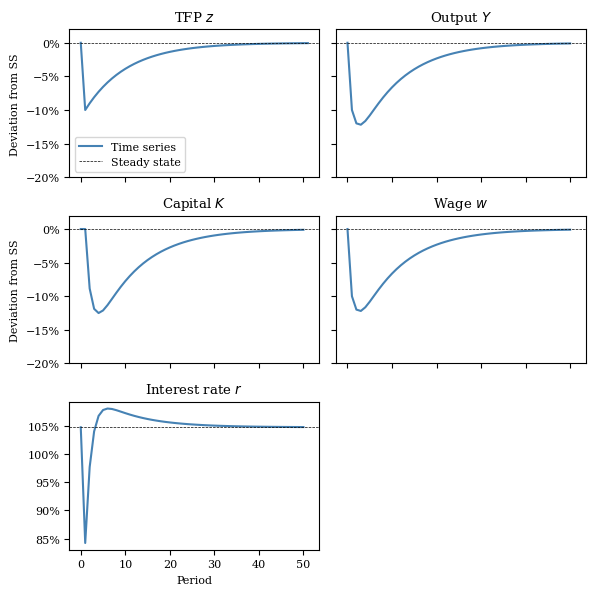

In [30]:
plot_simulation(eq, sim)